# Mini Project
# Part 1: The Data analysis
Author: Zhicong Sun  
SID: 12032471  
Date: 2021.5.6

## 1 First meeting with data set
### 1.1 First meeting with attribute data and labels

In [ ]:
# import basic module
import numpy as np
import pandas as pd
import csv
import string

In [2]:
# read attribute data and train label from txt file
attr_data = pd.read_csv("attr.csv",header = None,usecols = [1,2,3,4,5,6])
train_label = pd.read_csv("label_train.csv",header=None,usecols = [1])

print("attr_data.head:\n",attr_data.head(),"\n")
print("Shape of attr_data: ",attr_data.shape,"\n")
print("train_label.head:\n",train_label.head(),"\n")
print("Shape of train_label: ",train_label.shape) 

attr_data.head:
    1  2   3   4    5      6
0  1  2   8  22    0  23574
1  2  2  15  14  229      0
2  1  1   3   0  237   9976
3  2  2   3   0  230  19776
4  1  2   6   0  229  17097 

Shape of attr_data:  (5298, 6) 

train_label.head:
       1
0  2009
1  2004
2  2008
3  2002
4  2007 

Shape of train_label:  (4000, 1)


***
**Note:**  

1. It can be seem that the attribute data set has 5298 row and 6 column, which means there are 6 features. Because the data set has no feature names, so we use feature i to name them in the 1.2. After adding feature name, data will have one more row.  
***
### 1.2 Assign feature names to attribute data and labels


In [21]:
# assign a feature name to each column of train data set, test data set and their corresponding labels
feature_names = []
for i in range(attr_data.shape[1]):
    feature_names.append("feature" + str(i+1))
attr_data = pd.read_csv("attr.csv",header = None,usecols = [1,2,3,4,5,6],names=feature_names)
train_data = pd.read_csv("attr.csv",header = None,usecols = [1,2,3,4,5,6],nrows=4000,names=feature_names)
train_label = pd.read_csv("label_train.csv",header=None,usecols = [1],names=["label"])
test_data = pd.read_csv("attr.csv",header = None,usecols = [1,2,3,4,5,6],skiprows = 4000,nrows=1298,names=feature_names)
test_label = pd.read_csv("label_test.csv",header=None,usecols = [1],names=["label"])


print("feature names: ",feature_names,"\n")
print("\nattr_data.head:\n",attr_data.head(),"\n")
print("train data: \n",train_data.head(),"\n")
print("shape of train data: ",train_data.shape,"\n")
print("train label:\n ",train_label.head(),"\n")
print("shape of train label: ",train_label.shape,"\n")
print("test data:\n ",test_data.head(),"\n")
print("shape of test data: ",test_data.shape,"\n")
print("test label: \n",test_label.head(),"\n")
print("shape of test label: ",test_label.shape,"\n")

feature names:  ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6'] 


attr_data.head:
    feature1  feature2  feature3  feature4  feature5  feature6
0         1         2         8        22         0     23574
1         2         2        15        14       229         0
2         1         1         3         0       237      9976
3         2         2         3         0       230     19776
4         1         2         6         0       229     17097 

train data: 
    feature1  feature2  feature3  feature4  feature5  feature6
0         1         2         8        22         0     23574
1         2         2        15        14       229         0
2         1         1         3         0       237      9976
3         2         2         3         0       230     19776
4         1         2         6         0       229     17097 

shape of train data:  (4000, 6) 

train label:
     label
0   2009
1   2004
2   2008
3   2002
4   2007 

shape of train label:  (

### 1.3 Process adjacent list
Change the adjacent matrix to accessible matrix. In the accessible matrix, data(i,j) = 1 means that i-th sample and j-th sample are connected, otherwise they don't connect.

In [4]:
# read adjlist.csv and obtain the accessible matrix
tep_adjdata = []
with open('adjlist.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        tep_adjdata.append(row)
adjlist_data = []
for i in range(len(tep_adjdata)):
    if len(tep_adjdata[i]) == 2 and tep_adjdata[i][1] == '':
        tep_adjdata[i].pop()
    tmp = []
    for j in range(len(tep_adjdata[i])):
        tmp.append(int(tep_adjdata[i][j]))
    adjlist_data.append(tmp)
adjmatrix = np.zeros((5298,5298),dtype = int)
for row in range(len(adjlist_data)):
    for column in range(len(adjlist_data[row])):
        if column != 0:
            adjmatrix[row][adjlist_data[row][column]] = 1
adjmatrix = pd.DataFrame(adjmatrix)
print(adjmatrix)

      0     1     2     3     4     5     6     7     8     9     ...  5288  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     1     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
5293     0     0     0     0     0     0     0     0     0     0  ...     0   
5294     0     0     0     0     0     0     0     0     0     0  ...     0   
5295     0     0     0     0     0     0     0     0     0     0  ...     0   
5296     0     0     0     0     0     0     0     0     0     0  ...     0   
5297     0     0     0     0     0     0     0     0     0     0  ...     0   

      5289  5290  5291  5292  5293  5294  5295  529

### 2 Data exploration  
#### 2.1 Check if the data has missing values

In [5]:
# check if the data has missing values 
print("train_data.info:")
train_data.info()
print("\nsum of Null values:\n",train_data.isnull().sum())

train_data.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  4000 non-null   int64
 1   feature2  4000 non-null   int64
 2   feature3  4000 non-null   int64
 3   feature4  4000 non-null   int64
 4   feature5  4000 non-null   int64
 5   feature6  4000 non-null   int64
dtypes: int64(6)
memory usage: 187.6 KB

sum of Null values:
 feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
dtype: int64


***
**Note:**  

There are no missing value, we don't need to supplement any value
***

#### 2.2 Label visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

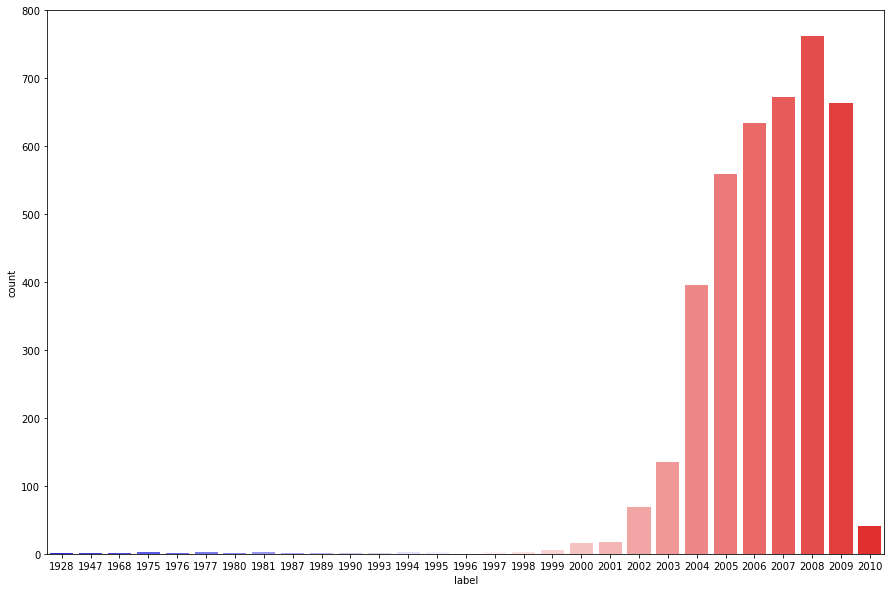

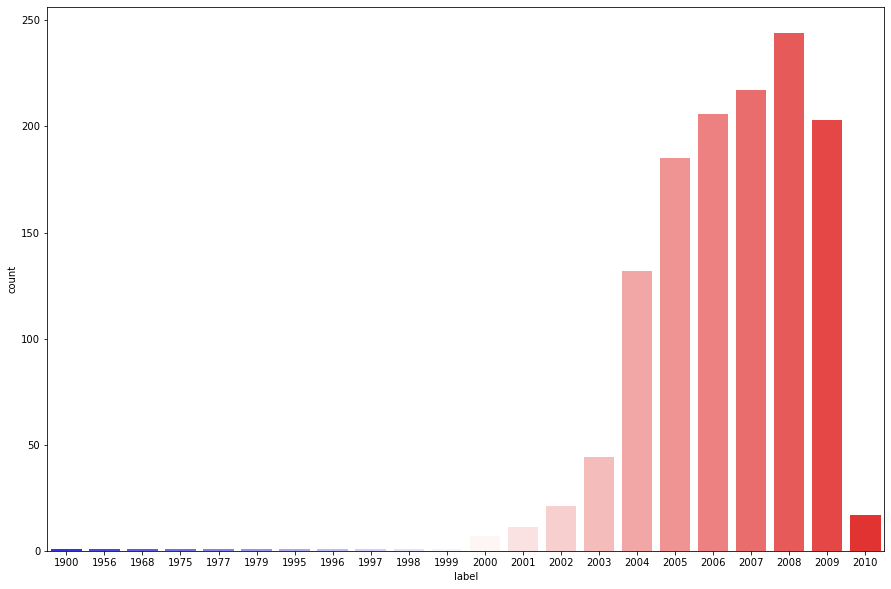

train_lael has:  29  labels
test_lael has:  22  labels
total_lael has:  32  labels


In [7]:
# train label visualization
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x="label", data=train_label, palette="bwr")
plt.show()

# test label visualization
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x="label", data=test_label, palette="bwr")
plt.show()
print("train_lael has: ",len(train_label['label'].unique())," labels")
print("test_lael has: ",len(test_label['label'].unique())," labels")
total_label = pd.concat([train_label,test_label], axis=0)
print("total_lael has: ",len(total_label['label'].unique())," labels")

***
**Note:**  

1. There are 29 labels in the train dataset while 22 labels in test dataset, and the total number of labels is 32.

2. It means that some labels of the test dataset are not available in the training dataset, and some labels of the training set do not appear in the test dataset. 

3. So we should encode all 32 labels.
***

#### 2.3 Correlation matrix visualization and statistics for features

In [8]:
# view statistics for all features
train_data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1.436250,1.53425,9.051000,7.600000,207.678750,18583.684000
std,0.926634,0.55218,7.605121,10.167981,86.331708,18537.886685
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.00000,5.000000,0.000000,229.000000,2973.000000
50%,1.000000,2.00000,7.000000,0.000000,233.000000,12202.000000
75%,2.000000,2.00000,14.000000,15.000000,247.000000,24517.000000
max,6.000000,2.00000,44.000000,44.000000,290.000000,61240.000000


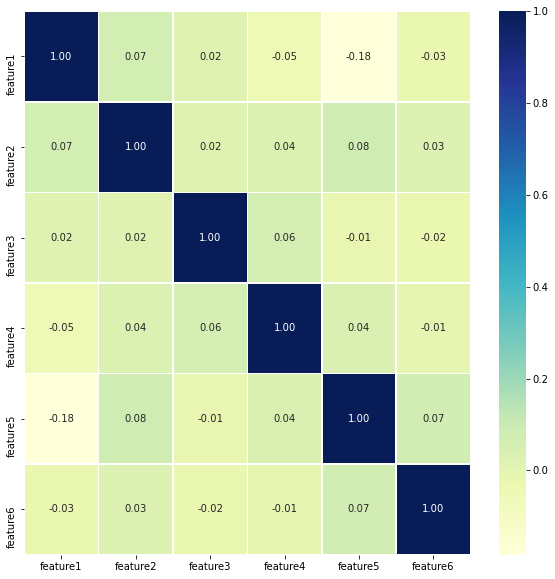

In [9]:
# correlation matrix visualization
corr_matrix = train_data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()

<AxesSubplot:title={'center':'Correlation with label'}>

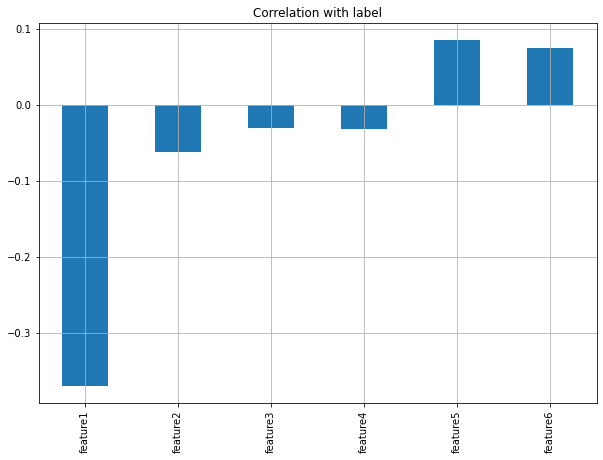

In [10]:
train_data.corrwith(train_label.label).plot(kind='bar',grid=True,figsize=(10, 7),title="Correlation with label")

***
**Note:**  
Most of the features have a strong correlation with the label, but there are also a few features that are not strongly associated with the label, such as feature 4 and feature 5. 
***
#### 2.4 Divide features into categorical value and continous value


In [11]:
# divide features into categorical value and continous value
categorical_val = []
continous_val = []
for column in train_data.columns:
    print('---------------------------')
    print(f"{column} : {train_data[column].unique()}")
    if len(train_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
print("\ncategorical features:",categorical_val)
print("\ncontinous_val features:",continous_val)

---------------------------
feature1 : [1 2 5 3 6 4]
---------------------------
feature2 : [2 1 0]
---------------------------
feature3 : [ 8 15  3  6  7 10  0 14  2 18 16  1  9 13 12 29 39  5 30 27  4 17 33 24
 25 31 44 22 11 28 34 32 26 41 20 43 21 23 37 35 42 19 40]
---------------------------
feature4 : [22 14  0 10  6  7 15 24 28  9 30  3 25 23 18 29  4 16 36 41 26  8 13  5
 17 12  1  2 31 27 34 11 19 33 37 21 43 35 20 39 44 32 40]
---------------------------
feature5 : [  0 229 237 230 286 268 283 236 227 228 274 275 256 231 255 258 278 241
 251 261 240 233 276 254 246 265 247 232 285 244 264 253 242 272 250 234
 270 257 260 259 245 249 267 248 235 262 280 284 266 243 263 288 282 269
 271 252 239 279 290 281 287 289 273 238]
---------------------------
feature6 : [23574     0  9976 ... 53700  9884 53767]

categorical features: ['feature1', 'feature2']

continous_val features: ['feature3', 'feature4', 'feature5', 'feature6']


#### 2.5 Continous features visualization

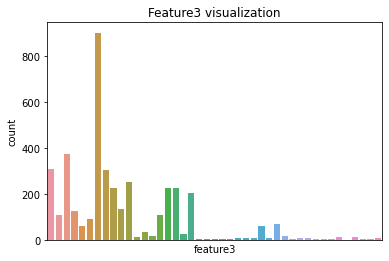

In [12]:
# feature3 visualization
sns.countplot(x='feature3', data=train_data)
plt.title("Feature3 visualization")
plt.xticks([])
plt.show()

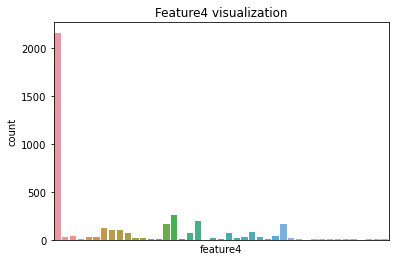

In [13]:
# feature4 visualization
sns.countplot(x='feature4', data=train_data)
plt.title("Feature4 visualization")
plt.xticks([])
plt.show()

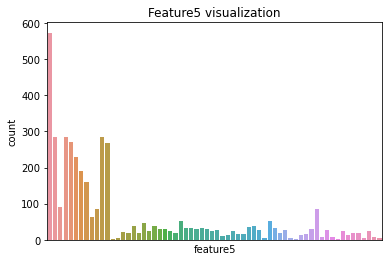

In [14]:
# feature5 visualization
sns.countplot(x='feature5', data=train_data)
plt.title("Feature5 visualization")
plt.xticks([])
plt.show()

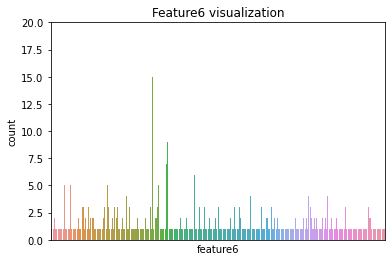

In [15]:
# feature6 visualization
sns.countplot(x='feature6', data=train_data)
plt.title("Feature6 visualization")
plt.xticks([])
plt.ylim((0, 20))
plt.show()

***
**Note:**  

1. The continuous features have almost no outliers.  

2. The feature3, feature6 seem to obey the normal distribution.  

3. It is hard to figure out if the feature4 and feature5 obey the normal distribution, but I tend to treat them as a feature following the normal distribution. Because it appears to follow a normal distribution if we supplement the data on the left side of the axis (even if the data is meaningless).
***

#### 2.6 Categorical features visualization

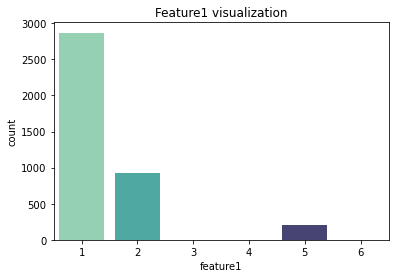

In [16]:
# feature1 visualization
sns.countplot(x='feature1', data=train_data, palette="mako_r")
plt.title("Feature1 visualization")
plt.show()

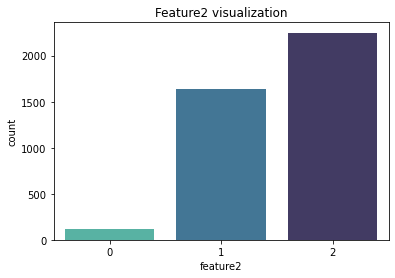

In [17]:
# feature2 visualization
sns.countplot(x='feature2', data=train_data, palette="mako_r")
plt.title("Feature2 visualization")
plt.show()

***
**Note:**  

It is hard to determin which features is ordered. So we regard them as disorderd features and tolerate the loss of information caused by using features as an unordered variable.
***

## 3 Data preprocessing example
***  
Based on the data exploration, we can get the following conclusions:  

1. There is no missing value in data set.    

2. There are two types of features: categorical and continous.  

3. The continuous features have almost no outliers and most of they seem to obey the nomal distribution.  

4. The categorical features can be regarded as disordered vaue.
***

### 3.1 Dummy coding of categorical features

In [18]:
# dummy coding of categorical features
train_dataset = pd.get_dummies(train_data, columns = categorical_val)
print(train_data.columns)
print(train_dataset.columns)

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6'], dtype='object')
Index(['feature3', 'feature4', 'feature5', 'feature6', 'feature1_1',
       'feature1_2', 'feature1_3', 'feature1_4', 'feature1_5', 'feature1_6',
       'feature2_0', 'feature2_1', 'feature2_2'],
      dtype='object')


### 3.2 Features scaling of continous features

In [19]:
# standardization
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data_aft_stdsscsl = train_dataset
data_aft_stdsscsl[continous_val] = standard_scaler.fit_transform(train_dataset[continous_val])
data_aft_stdsscsl.head()

,feature3,feature4,feature5,feature6,feature1_1,feature1_2,feature1_3,feature1_4,feature1_5,feature1_6,feature2_0,feature2_1,feature2_2
0,-0.138214,1.416387,-2.405891,0.269229,1,0,0,0,0,0,0,0,1
1,0.782334,0.629505,0.247000,-1.002596,0,1,0,0,0,0,0,0,1
2,-0.795748,-0.747538,0.339677,-0.464387,1,0,0,0,0,0,0,1,0
3,-0.795748,-0.747538,0.258584,0.064326,0,1,0,0,0,0,0,0,1
4,-0.401227,-0.747538,0.247000,-0.080207,1,0,0,0,0,0,0,0,1


In [20]:

data_aft_stdsscsl = pd.concat([data_aft_stdsscsl,adjmatrix[0:4000]], axis=1)
data_aft_stdsscsl.head()
data_aft_stdsscsl.shape

(4000, 5311)

***
**Note:**  

1. If the accessible matrix should be used as train data, we need to combine this matrix and other features.

2. In this case, we add 5298 features, so the total number of labels reached 5311.

3. These new labels are used to indicate whether the current sample point is connected with another sample point
***